In [1]:
import sys
from os import path
_up_one = path.abspath('../')
if _up_one not in sys.path:
    sys.path.insert(1, _up_one)

# Third-party
from astropy.io import ascii
import astropy.coordinates as coord
from astropy.table import hstack, Table, join
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.integrate import tplquad
from scipy.optimize import minimize
from tqdm import tqdm

import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic
from lg_barycentric import LocalGroupBarycentric

In [13]:
m = 1.12 * 1e12 / (np.log(2) + 2/(np.log(2) + 1))
mw2 = gp.MilkyWayPotential(halo=dict(m=m*u.Msun))
mw2.mass_enclosed([224, 0.,0.])

<Quantity [1.1476226e+12] solMass>

In [2]:
import re
def get_shortname(txt):
    # from Jana
    if ('Andromeda' in txt):
        roman = txt.split('Andromeda')
        roman = ''.join(roman)
        label = "And" + roman
    elif ('Sag' in txt):
        tag = re.findall(r"dSph",txt) + re.findall(r"II",txt) + re.findall(r"dIrr",txt)
        tag = ''.join(tag)
        label = "Sag" + tag
    elif ('Tuc' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"V",txt) + re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tuc" + tag
    elif ('Horo' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "Hor" + tag
    elif ('Retic' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Ret" + tag
    elif ('Ursa Major' in txt) or ('UrsaMajor' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "UMa" + tag
    elif ('Bootes' in txt) or ('Boötes' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "Boö" + tag
    elif ('Carina' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Car" + tag
    elif ('Segue' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Seg" + tag
    elif ('Hydr' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Hyd" + tag
    elif ('Cetus' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Cet" + tag
    elif ('Triangulum' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tri" + tag
    elif ('Coma Berenices' in txt) or ('ComaBerenices' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Com" + tag
    elif ('Ursa Minor' in txt) or ('UrsaMinor' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "UMi" + tag
    elif ('Pisces' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Psc" + tag
    elif ('Pictor' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Pic" + tag
    elif ('Eridan' in txt):
        tag =  re.findall(r"3",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Eri" + tag
    elif ('Hercules' in txt):
        tag =  re.findall(r"3",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Her" + tag
    elif ('Canes Venatici' in txt) or ('CanesVenatici' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "CVn" + tag
    elif ('Columba' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Col" + tag
    elif ('Pegasus' in txt):
        tag =  re.findall(r"3",txt)+re.findall(r"dIrr",txt)
        tag = ''.join(tag)
        label = "Peg" + tag
    elif ('Draco' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Dra" + tag
    elif ('Phoenix' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Phe" + tag
    elif ('Sextans' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"A",txt)+re.findall(r"B",txt)
        tag = ''.join(tag)
        label = "Sex" + tag
    elif ('Tucana' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"V",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tuc" + tag
    elif ('Virgo' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Vir" + tag
    elif ('Aquarius' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Aqr" + tag
    elif ('Sculptor' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Scl" + tag
    elif ('Crater' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Crt" + tag
    elif ('Fornax' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "For" + tag
    elif ('Grus' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Gru" + tag
    elif ('Cassiopeia' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Cas" + tag
    elif ('Lacerta' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Lac" + tag
    elif ('Perseus' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Per" + tag
    elif 'Willman' in txt:
        label = 'Wil1'
    else:
        label = txt
    return label

In [3]:
galcen_frame = coord.Galactocentric(galcen_distance=8.1*u.kpc)

In [4]:
# row_data = []
# with open('../table2.tex', 'r') as f:
#     lines = f.read().split('\\ ')
    
#     for line in lines:
#         cols = [x.strip() for x in line.strip().split('&')]
        
#         try:
#             if cols[3] == '-':
#                 continue

#             elif cols[3].startswith('$'):
#                 disp = float(cols[3][3:])
#                 limit = True

#             else:
#                 disp = float(cols[3])
#                 limit = False
#         except:
#             print(cols)
        
#         row_data.append({
#             'name': cols[0],
#             'vdisp': disp,
#             'limit': limit
#         })
        
# new_table2 = at.Table(row_data)

In [5]:
# tbl2 = Table.read('../data/dwarf_ngas.csv')
# derp = at.join(tbl2, new_table2, keys='name')
# derp[derp['vdisp_1'] != derp['vdisp_2']]

In [92]:
kinematics = ascii.read('../data/dwarf_kinematics_apw.csv')
kinematics.rename_column('name', 'GalaxyName')
kinematics = kinematics[~kinematics['rv'].mask]

new = at.Table.read('../data/dwarfs_ell_orbits_mpupdated_0908_simonupdated.csv')
for name in ['vsig_s', 'vsig_err_pos', 'vsig_err_neg', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg']:
    new[name][new[name] == 99.9] = np.nan
    if hasattr(new[name], 'mask'):
        new[name] = new[name].filled(np.nan)
        

new_c = coord.SkyCoord(ra=new['RA(J2000)'], 
                       dec=new['Dec(J2000)'],
                       unit=(u.hourangle, u.deg))
kin_c = coord.SkyCoord(ra=kinematics['ra'] * u.deg, 
                       dec=kinematics['dec'] * u.deg)

idx, sep, sep3d = kin_c.match_to_catalog_3d(new_c)
tbl = hstack((kinematics[sep < 2*u.deg], new[idx[sep < 2*u.deg]]))
tbl.rename_column('GalaxyName_2', 'GalaxyName')

In [93]:
# OLD TABLES:
# tbl = Table.read('../data/dwarf_kinematics_apw.csv')
# tbl = tbl[~tbl['rv'].mask]

# # This is where the per-dwarf ngas estimates come from, but we now use a fixed value
# # tbl2 = Table.read('../data/dwarf_ngas.csv', header_start=1)
# # tbl = join(tbl, tbl2, keys='name')
# tbl_c = coord.SkyCoord(ra=tbl['ra']*u.deg, dec=tbl['dec']*u.deg, 
#                        distance=tbl['dist'] * u.kpc)

# # Now cross-match to the existing dwarfs table:
# dwarfs = Table.read('../data/dwarfs_ell.csv')
# ra = (dwarfs['RA_hr']+dwarfs['RA_min']/60.+dwarfs['RA_sec']/3600) * u.hourangle
# dec = (dwarfs['Dec_deg']+dwarfs['Dec_arcmin']/60+dwarfs['Dec_arcsec']/3600) * u.degree
# dist = coord.Distance(distmod=dwarfs['m-M'])
# dwarfs_c = coord.SkyCoord(ra, dec, distance=dist)

# idx, sep, sep3d = tbl_c.match_to_catalog_3d(dwarfs_c)

# idx = idx[sep < 2*u.deg]
# dwarfs = dwarfs[idx]
# dwarfs_c = dwarfs_c[idx]

# tbl = tbl[sep < 2*u.deg]

# tbl = hstack((tbl, dwarfs))

- PiscesII - 5.4  +3.6 -2.4  
- AquariusII - 5.4 +3.4 -2.5
- CarinaIII - 5.6 +4.3 -2.1
- HydrusI - 2.7 +0.5 -0.4
- CarinaII - 3.4 +1.2 -0.8
- DracoII - <5.9
- CraterII - 2.7 + 0.3 -0.3

columns: vsig_s, vsig_err_pos, vsig_err_neg, vsig_s_upper_limit, vsig_s_err

In [94]:
from scipy.stats import truncnorm
def sample_truncnorm(mu, sigma, a=0, b=1000., size=1):
    x1 = (a - mu) / sigma
    x2 = (b - mu) / sigma
    return truncnorm.rvs(a=x1, b=x2, loc=mu, scale=sigma, size=size)

In [95]:
# FOR OLD TABLES:
# _max_err = np.max((tbl['vsig_err_pos'], tbl['vsig_err_neg']), axis=0)
# tbl['vsig_s_err'][_max_err < 99.] = _max_err[_max_err < 99.]

# tbl['vsig_s_upper_limit'][tbl['name'] == 'Draco II'] = 5.9
# tbl['vsig_s_upper_limit'][tbl['name'] == 'Grus I'] = 9.8 # Walker 2016

# tbl['vsig_s_err'][tbl['name'] == 'Pisces II'] = 3.6
# tbl['vsig_s_err'][tbl['name'] == 'Aquarius II'] = 3.4
# tbl['vsig_s_err'][tbl['name'] == 'Carina III'] = 4.3
# tbl['vsig_s_err'][tbl['name'] == 'Hydrus I'] = 0.5
# tbl['vsig_s_err'][tbl['name'] == 'Carina II'] = 1.2
# tbl['vsig_s_err'][tbl['name'] == 'Crater II'] = 0.3
# tbl['vsig_s_err'][tbl['name'] == 'Horologium I'] = 2.8 # Koposov, Casey et al. 2015

# tbl['vsig_s'][tbl['name'] == 'Reticulum II'] = 3.22  # Koposov, Casey et al. 2015
# tbl['vsig_s_err'][tbl['name'] == 'Reticulum II'] = 1.64  # Koposov, Casey et al. 2015

# tbl['vsig_s'][tbl['name'] == 'Phoenix I'] = 9.3  # Kacharov, Battaglia et al. 2017
# tbl['vsig_s_err'][tbl['name'] == 'Phoenix I'] = 0.7  # Kacharov, Battaglia et al. 2017

# tbl['vsig_s'][tbl['name'] == 'Tucana II'] = 8.6  # Walker et al. 2016
# tbl['vsig_s_err'][tbl['name'] == 'Tucana II'] = 4.4  # Walker et al. 2016

# tbl['vsig_s_err'][tbl['name'] == 'Eridanus II'] = 0.3 # Li et al. 2017

_max_err = np.max((tbl['vsig_err_pos'], tbl['vsig_err_neg']), axis=0)
tbl['vsig_s_err'] = _max_err

# For new table:
tbl['vsig_s'][tbl['GalaxyName_1'] == 'Hydra II'] = 3.6

tbl['vsig_s'][tbl['GalaxyName_1'] == 'Carina III'] = 5.6
tbl['vsig_s_err'][tbl['GalaxyName_1'] == 'Carina III'] = 4.3

tbl['vsig_s'][tbl['GalaxyName_1'] == 'Hydrus I'] = 2.7
tbl['vsig_s_err'][tbl['GalaxyName_1'] == 'Hydrus I'] = 0.5

tbl['vsig_s'][tbl['GalaxyName_1'] == 'Draco II'] = 2.9
tbl['vsig_s_err'][tbl['GalaxyName_1'] == 'Draco II'] = 2.1

tbl['vsig_s'][tbl['GalaxyName_1'] == 'Triangulum II'] = 3.4

tbl['vsig_s'][tbl['GalaxyName_1'] == 'Tucana III'] = 0.1
tbl['vsig_s_err'][tbl['GalaxyName_1'] == 'Tucana III'] = 0.7

In [96]:
C_pm = np.zeros((len(tbl), 2, 2))
C_pm[:, 0, 0] = tbl['pmra_error1']**2 + tbl['pmra_error2']**2
C_pm[:, 1, 1] = tbl['pmdec_error1']**2 + tbl['pmdec_error2']**2
C_pm[:, 0, 1] = C_pm[:, 1, 0] = np.sqrt(C_pm[:, 0, 0]) * np.sqrt(C_pm[:, 1, 1]) * tbl['pmra_pmdec_corr']

In [97]:
dwarfs_c = coord.SkyCoord(ra=tbl['RA(J2000)'], 
                          dec=tbl['Dec(J2000)'],
                          unit=(u.hourangle, u.deg),
                          distance=tbl['dist_kpc'] * u.kpc)

In [98]:
# mw2 = gp.MilkyWayPotential(halo=dict(m=6.4e11*u.Msun))
# print(mw2.mass_enclosed([224.2,0,0.]*u.kpc))

# n_samples = 1024

# all_peris = []
# all_vperis = []

# all_apos = []
# all_vapos = []

# for i, row, C in tqdm(zip(range(len(tbl)), tbl, C_pm), total=len(tbl)):    
#     ras = np.full(n_samples, dwarfs_c[i].ra.degree)
#     decs = np.full(n_samples, dwarfs_c[i].dec.degree)
#     dists = np.random.normal(row['dist'], row['dist_error'], 
#                              size=n_samples) * u.kpc
    
#     pmras, pmdecs = np.random.multivariate_normal([row['pmra'], row['pmdec']], C, 
#                                                   size=n_samples).T * u.mas/u.yr
#     rvs = np.random.normal(row['rv'], row['rv_error'], size=n_samples) * u.km/u.s
    
#     c_samples = coord.SkyCoord(ra=ras*u.deg,
#                                dec=decs*u.deg,
#                                distance=dists,
#                                pm_ra_cosdec=pmras, 
#                                pm_dec=pmdecs,
#                                radial_velocity=rvs)
    
#     w0 = gd.PhaseSpacePosition(c_samples.transform_to(galcen_frame).data)
#     orbits = mw2.integrate_orbit(w0, dt=-1, t1=0, t2=-4*u.Gyr)
#     # orbits = pot.integrate_orbit(w0, dt=-1, t1=0, t2=-4*u.Gyr)
    
#     r_gc = orbits.physicsspherical.r
#     v_gc = np.sqrt(np.sum(orbits.v_xyz**2, axis=0))
    
#     peri_idx = r_gc.argmin(axis=0)
#     peris = u.Quantity([r_gc[i, j] for j, i in enumerate(peri_idx)])
#     v_peris = u.Quantity([v_gc[i, j] for j, i in enumerate(peri_idx)]).to(u.km/u.s)
    
#     apo_idx = r_gc.argmax(axis=0)
#     apos = u.Quantity([r_gc[i, j] for j, i in enumerate(apo_idx)])
#     v_apos = u.Quantity([v_gc[i, j] for j, i in enumerate(apo_idx)]).to(u.km/u.s)
    
#     all_peris.append(peris)
#     all_vperis.append(v_peris)
    
#     all_apos.append(apos)
#     all_vapos.append(v_apos)

# all_peris = u.Quantity(all_peris)
# all_vperis = u.Quantity(all_vperis)

# all_apos = u.Quantity(all_apos)
# all_vapos = u.Quantity(all_vapos)

In [27]:
n_samples = 1024

all_w0s = []
for i, row, C in tqdm(zip(range(len(tbl)), tbl, C_pm), total=len(tbl)):    
    ras = np.full(n_samples, dwarfs_c[i].ra.degree)
    decs = np.full(n_samples, dwarfs_c[i].dec.degree)
    dists = np.random.normal(row['dist'], row['dist_error'], 
                             size=n_samples) * u.kpc
    
    pmras, pmdecs = np.random.multivariate_normal([row['pmra'], row['pmdec']], C, 
                                                  size=n_samples).T * u.mas/u.yr
    rvs = np.random.normal(row['rv'], row['rv_error'], size=n_samples) * u.km/u.s
    
    c_samples = coord.SkyCoord(ra=ras*u.deg,
                               dec=decs*u.deg,
                               distance=dists,
                               pm_ra_cosdec=pmras, 
                               pm_dec=pmdecs,
                               radial_velocity=rvs)
    
    w0 = gd.PhaseSpacePosition(c_samples.transform_to(galcen_frame).data)
    all_w0s.append(w0[None])

all_w0s = gd.combine(all_w0s)

100%|██████████| 38/38 [00:00<00:00, 136.57it/s]


In [28]:
all_peris = []
all_vperis = []

all_apos = []
all_vapos = []

rnd = np.random.default_rng(42)
for k in tqdm(range(all_w0s.shape[1]), total=n_samples):
    w0 = all_w0s[:, k]
    
    m = rnd.uniform(0.9, 1.5) * 1e12 / (np.log(2) + 2/(np.log(2) + 1))
#     m = 1.2 * 1e12 / (np.log(2) + 2/(np.log(2) + 1))
    mw2 = gp.MilkyWayPotential(halo=dict(m=m*u.Msun))
    orbits = mw2.integrate_orbit(w0, dt=-1, t1=0, t2=-4*u.Gyr)
    
    r_gc = orbits.physicsspherical.r
    v_gc = np.sqrt(np.sum(orbits.v_xyz**2, axis=0))
    
    peri_idx = r_gc.argmin(axis=0)
    peris = u.Quantity([r_gc[i, j] for j, i in enumerate(peri_idx)])
    v_peris = u.Quantity([v_gc[i, j] for j, i in enumerate(peri_idx)]).to(u.km/u.s)
    
    apo_idx = r_gc.argmax(axis=0)
    apos = u.Quantity([r_gc[i, j] for j, i in enumerate(apo_idx)])
    v_apos = u.Quantity([v_gc[i, j] for j, i in enumerate(apo_idx)]).to(u.km/u.s)
    
    all_peris.append(peris)
    all_vperis.append(v_peris)
    
    all_apos.append(apos)
    all_vapos.append(v_apos)

all_peris = u.Quantity(all_peris).T
all_vperis = u.Quantity(all_vperis).T

all_apos = u.Quantity(all_apos).T
all_vapos = u.Quantity(all_vapos).T

100%|██████████| 1024/1024 [01:39<00:00, 10.26it/s]


In [99]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# ax.loglog(np.mean(all_peris, axis=1), np.mean(all_vperis, axis=1), 
#           ls='none', marker='o', ms=3., color='k');

# for row, rr, vv in zip(tbl, np.mean(all_peris, axis=1), np.mean(all_vperis, axis=1)):
#     a, *_, b = row['name'].split(" ")
#     new_name = a[:3]+b
#     ax.text(rr.value, vv.value, new_name, 
#             ha='center', va='bottom')

# ax.set_xlabel(r'$r_{\rm per}$ ' + '[kpc]')
# ax.set_ylabel(r'$v_{\rm per}$ ' + '[{:latex_inline}]'.format(u.km/u.s))

# ax.set_xlim(1, 1e3)
# ax.set_ylim(150, 1.2e3)

# fig.set_facecolor('w')
# fig.tight_layout()

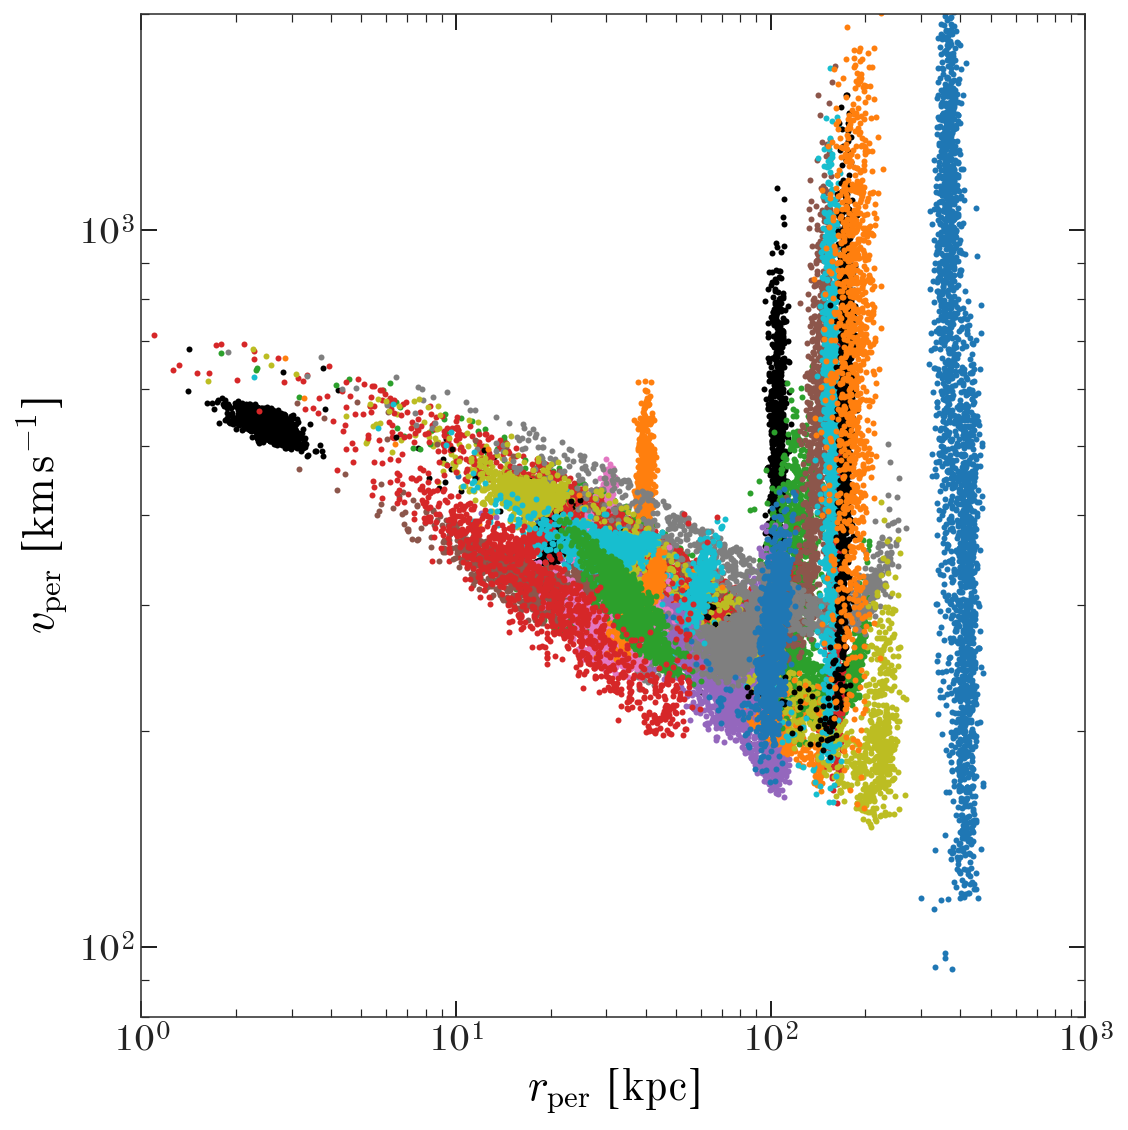

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.loglog(all_peris.T, all_vperis.T, ls='none', marker='o', ms=3.);
ax.set_xlabel(r'$r_{\rm per}$ ' + '[kpc]')
ax.set_ylabel(r'$v_{\rm per}$ ' + '[{:latex_inline}]'.format(u.km/u.s))
ax.set_xlim(1, 1e3)
ax.set_ylim(80, 2e3)
fig.set_facecolor('w')
fig.tight_layout()

In [101]:
# vel. disp. values
shape = all_vperis.T.shape
s = np.zeros(shape) * u.km/u.s

# # Upper limits - HACK!
# _mask = ~tbl['vsig_s_upper_limit'].mask
# s[:, _mask] = np.random.uniform(
#     0, tbl['vsig_s_upper_limit'][_mask],
#     size=(shape[0], _mask.sum())) * u.km/u.s

# # Measured dispersion
# _mask = tbl['vsig_s_upper_limit'].mask
# s[:, _mask] = sample_truncnorm(
#     tbl['vsig_s'][_mask], 
#     tbl['vsig_s_err'][_mask],
#     size=(shape[0], _mask.sum())) * u.km/u.s

_mask = np.isfinite(tbl['vsig_s_err'])
s[:, _mask] = sample_truncnorm(
    tbl['vsig_s'][_mask], 
    tbl['vsig_s_err'][_mask],
    size=(shape[0], _mask.sum())) * u.km/u.s

# Upper limits - HACK!
_mask = ~np.isfinite(tbl['vsig_s_err']) & np.isfinite(tbl['vsig_s'])
print(tbl['GalaxyName_1'][_mask])
s[:, _mask] = np.random.uniform(
    0, tbl['vsig_s'][_mask],
    size=(shape[0], _mask.sum())) * u.km/u.s

print(s[:, _mask])

s = s.T
# s = np.random.normal(tbl['vdisp'], 0.2*tbl['vdisp'], size=all_vperis.T.shape).T * u.km/u.s

# n_gas = tbl['ngas'][:, None] / u.cm**3
n_gas = 0.37 / u.cm**3
# n_gas = np.random.uniform(0.1, 0.6, size=(len(tbl), n_samples)) / u.cm**3

vsat_p = all_vperis
vsat_a = all_vapos

n_halo_p = s**2 * n_gas / (vsat_p**2)
n_halo_a = s**2 * n_gas / (vsat_a**2)

n_halo_p_std = np.std(n_halo_p, axis=1)
_tmp = np.percentile(n_halo_p, q=[16, 50, 84], axis=1)
n_halo_p_err1 = _tmp[1] - _tmp[0]
n_halo_p_err2 = _tmp[2] - _tmp[1]

n_halo_a_std = np.std(n_halo_a, axis=1)
_tmp = np.percentile(n_halo_a, q=[16, 50, 84], axis=1)
n_halo_a_err1 = _tmp[1] - _tmp[0]
n_halo_a_err2 = _tmp[2] - _tmp[1]

n_halo_p = np.median(n_halo_p, axis=1)
n_halo_a = np.median(n_halo_a, axis=1)

 GalaxyName_1
-------------
     Hydra II
Triangulum II
[[3.11120796 0.99813559]
 [1.58586323 0.51746606]
 [0.69174958 3.3358145 ]
 ...
 [2.48348378 0.21882751]
 [2.20228695 1.99191365]
 [3.17036053 3.11526079]] km / s


In [106]:
_tmp = np.percentile(all_peris, q=[16, 50, 84], axis=1)
peris_err1 = _tmp[1] - _tmp[0]
peris_err2 = _tmp[2] - _tmp[1]

_tmp = np.percentile(all_apos, q=[16, 50, 84], axis=1)
apos_err1 = _tmp[1] - _tmp[0]
apos_err2 = _tmp[2] - _tmp[1]

In [107]:
_mask = np.isfinite(tbl['vsig_s_err'])
# _mask = ~tbl['vsig_s_upper_limit'].mask
plot_s = np.zeros(len(tbl))
# plot_s[_mask] = tbl['vsig_s_upper_limit'][_mask]
plot_s[_mask] = tbl['vsig_s'][_mask]

In [108]:
from adjustText import adjust_text

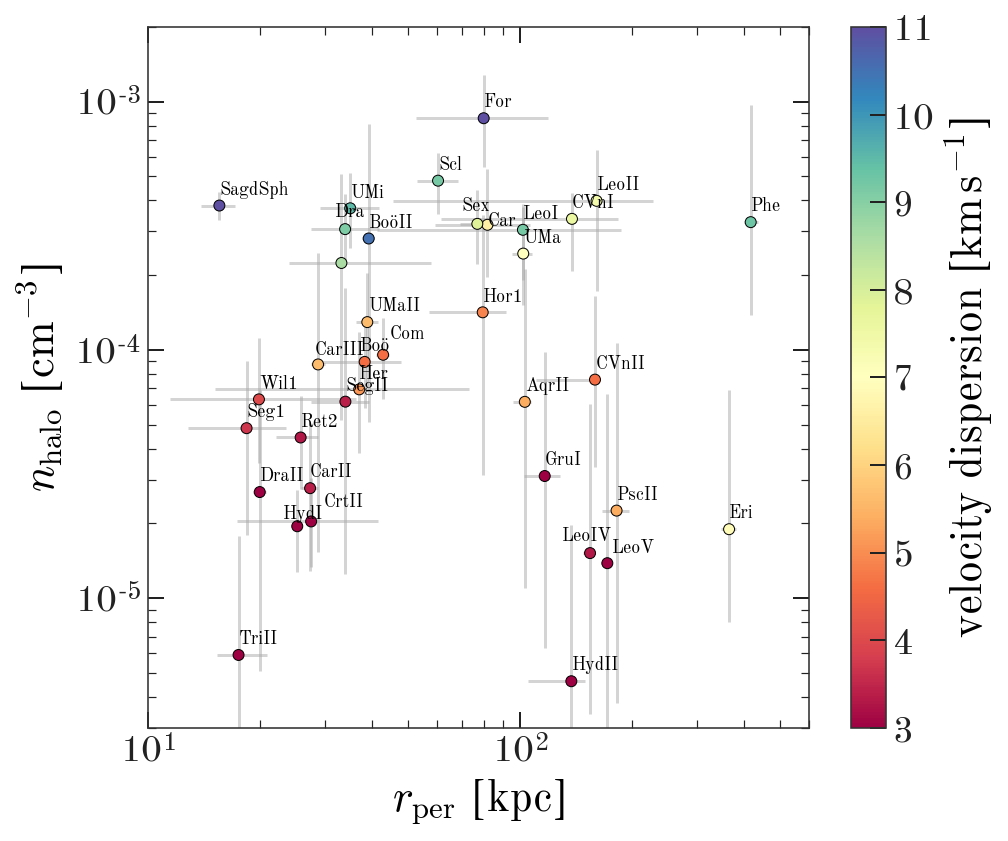

In [110]:
ptstyle = dict(cmap='Spectral', vmin=3, vmax=11,
               s=30, linewidth=0.5, edgecolor='k')

fig, ax = plt.subplots(1, 1, figsize=(7.2, 6))

# ax.scatter(np.mean(all_peris, axis=1), n_halo_p.value, c='k', s=8)
cbd = ax.scatter(np.median(all_peris, axis=1), 
           n_halo_p.value, 
           c=plot_s, **ptstyle)

texts = []
for row, rr, yy in zip(tbl, np.median(all_peris, axis=1), n_halo_p):
    if yy.value == 0 or yy.value < 3e-8:
        print(row['GalaxyName_1'], rr, yy)
        continue
        
    # a, *_, b = row['name'].split(" ")
    # new_name = a[:3] + b
    new_name = get_shortname(row['GalaxyName']).strip()
    
    if 'Tuc' in new_name:
        continue
    t = ax.text(rr.value, yy.value+0.1*yy.value, new_name, 
                ha='center', va='bottom', fontsize=9)
    texts.append(t)

ax.set_xlabel(r'$r_{\rm per}$ ' + '[kpc]')
ax.set_ylabel(r'$n_{\rm halo}$' + ' [{:latex_inline}]'.format(u.cm**-3))

ax.set_xlim(10, 6e2)
ax.set_ylim(3e-6, 2e-3)
ax.set_yscale('log')
ax.set_xscale('log')

cb = fig.colorbar(cbd)
cb.set_label(f'velocity dispersion [{u.km/u.s:latex_inline}]')


fig.tight_layout()

adjust_text(texts, ha='center', 
            autoalign=False, 
            expand_text=(1., 0.75), 
            expand_points=(1., 0.75), 
            expand_align=(1., 1.))

# Do this after adjust_text so the error bars don't repel:
ax.errorbar(np.median(all_peris, axis=1).value, n_halo_p.value, 
            xerr=(peris_err1.value, peris_err2.value),
            yerr=(n_halo_p_err1.value, n_halo_p_err2.value),
            marker='o', ls='none', c='#aaaaaa', zorder=-100, alpha=0.5)

fig.savefig('../plots/rper_all.pdf')

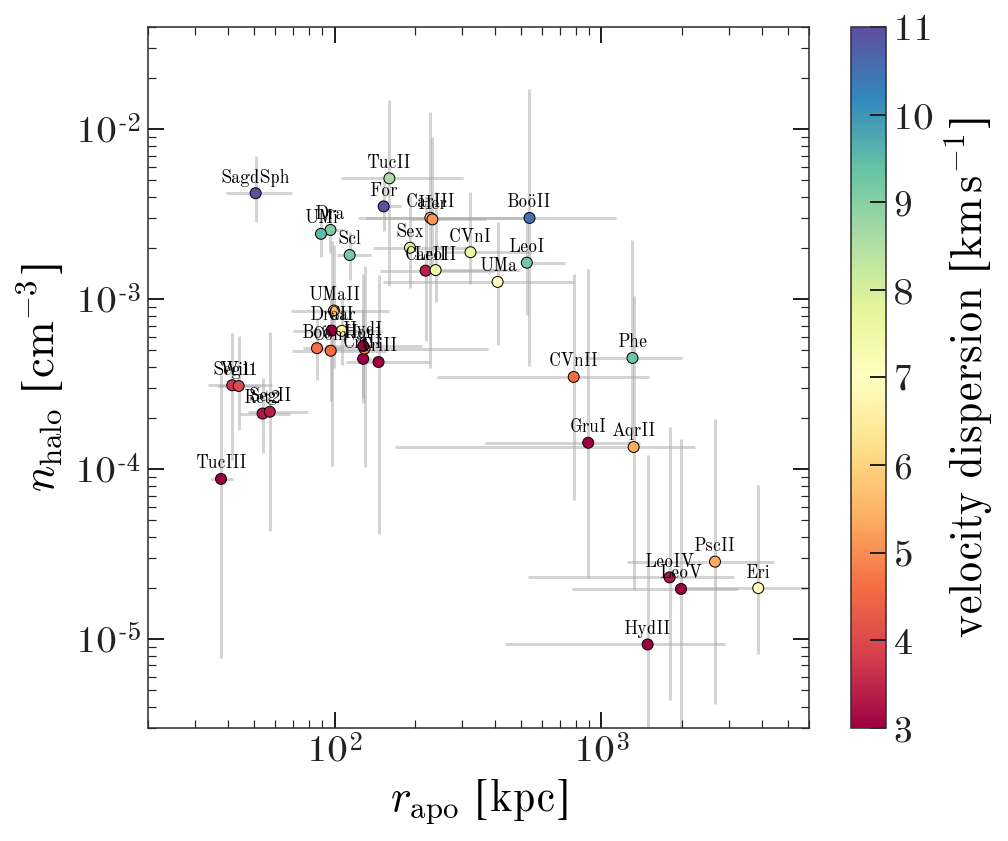

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(7.2, 6))

# ax.scatter(np.mean(all_peris, axis=1), n_halo_p.value, c='k', s=8)
cbd = ax.scatter(np.median(all_apos, axis=1), 
           n_halo_a.value, 
           c=plot_s, **ptstyle)

for row, rr, yy in zip(tbl, np.median(all_apos, axis=1), n_halo_a):
    if rr.value > 6e3 or yy.value > 4e-2 or yy.value < 3e-6:
        print(row['GalaxyName_2'], rr, yy)
        continue
        
    # a, *_, b = row['name'].split(" ")
    # new_name = a[:3] + b
    new_name = get_shortname(row['GalaxyName'])
    
    ax.text(rr.value, yy.value+0.1*yy.value, new_name, 
            ha='center', va='bottom', fontsize=9)

ax.set_xlabel(r'$r_{\rm apo}$ ' + '[kpc]')
ax.set_ylabel(r'$n_{\rm halo}$' + ' [{:latex_inline}]'.format(u.cm**-3))

ax.set_xlim(20, 6e3)
ax.set_ylim(3e-6, 4e-2)
ax.set_yscale('log')
ax.set_xscale('log')

cb = fig.colorbar(cbd)
cb.set_label(f'velocity dispersion [{u.km/u.s:latex_inline}]')

fig.tight_layout()

adjust_text(texts, ha='center', 
            autoalign=False, 
            expand_text=(1., 0.75), 
            expand_points=(1., 0.75), 
            expand_align=(1., 1.))

# Do this after adjust_text so the error bars don't repel:
ax.errorbar(np.median(all_apos, axis=1).value, n_halo_a.value, 
            xerr=(apos_err1.value, apos_err2.value),
            yerr=(n_halo_a_err1.value, n_halo_a_err2.value),
            marker='o', ls='none', c='#aaaaaa', zorder=-100, alpha=0.5)

fig.savefig('../plots/rapo_all.pdf')

In [112]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# ax.scatter(np.mean(all_apos, axis=1), n_halo_p.value, c='k')
# ax.errorbar(np.mean(all_apos, axis=1).value, n_halo_p.value, 
#             xerr=np.std(all_apos, axis=1).value,
#             yerr=n_halo_a_err.value,
#             marker='o', ls='none', c='#aaaaaa', zorder=-100, alpha=0.5)

# for row, rr, yy in zip(tbl, np.mean(all_apos, axis=1), n_halo_p):
#     if yy.value == 0 or yy.value < 1e-6:
#         continue
        
#     a, *_, b = row['name'].split(" ")
#     new_name = a[:3] + b
#     ax.text(rr.value, yy.value+0.1*yy.value, new_name, 
#             ha='center', va='bottom')

# ax.set_xlabel(r'$r_{\rm apo}$ ' + '[kpc]')
# ax.set_ylabel(r'$n_{\rm halo}$' + ' [{:latex_inline}]'.format(u.cm**-3))

# ax.set_xlim(8, 5e3)
# ax.set_ylim(8e-7, 1e-2)
# ax.set_yscale('log')
# ax.set_xscale('log')

# fig.set_facecolor('w')
# fig.tight_layout()

# fig.savefig('../plots/rapo_nhalo_0.35.pdf')
# # fig.savefig('../plots/rapo_nhalo_0.1-0.6.pdf')

In [113]:
# fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# ax.scatter(np.mean(all_peris, axis=1), n_halo_p.value, c='k', s=8)
# ax.errorbar(np.mean(all_peris, axis=1).value, n_halo_p.value, 
#             xerr=np.std(all_peris, axis=1).value,
#             yerr=n_halo_p_err.value,
#             marker='o', ls='none', c='#aaaaaa', zorder=-100, alpha=0.5)

# for row, rr, yy in zip(tbl, np.mean(all_peris, axis=1), n_halo_p):
#     if yy.value == 0 or yy.value < 1e-5:
#         continue
        
#     a, *_, b = row['name'].split(" ")
#     new_name = a[:3] + b
#     ax.text(rr.value, yy.value+0.1*yy.value, new_name, 
#             ha='center', va='bottom', fontsize=9)

# ax.set_xlabel(r'$r_{\rm per}$ ' + '[kpc]')
# ax.set_ylabel(r'$n_{\rm halo}$' + ' [{:latex_inline}]'.format(u.cm**-3))

# ax.set_xlim(8, 1e3)
# ax.set_ylim(8e-7, 1e-2)
# ax.set_yscale('log')
# ax.set_xscale('log')

# fig.set_facecolor('w')
# fig.tight_layout()

# fig.savefig('../plots/rper_nhalo_0.35.pdf')
# # fig.savefig('../plots/rper_nhalo_0.1-0.6.pdf')

In [120]:
n_halo_p[tbl['GalaxyName'] == 'HydraII']

<Quantity [4.62935122e-06] 1 / cm3>

In [121]:
kin_tbl = Table()

# kin_tbl['id'] = dwarfs['id']

kin_tbl['GalaxyName'] = tbl['GalaxyName']

kin_tbl['r_per_mean'] = np.mean(all_peris, axis=1).to(u.kpc)
kin_tbl['r_per_median'] = np.median(all_peris, axis=1).to(u.kpc)
kin_tbl['r_per_std'] = np.std(all_peris, axis=1).to(u.kpc)
kin_tbl['r_per_err1'] = peris_err1.to(u.kpc)
kin_tbl['r_per_err2'] = peris_err2.to(u.kpc)

kin_tbl['v_per_mean'] = np.mean(vsat_p, axis=1).to(u.km/u.s)
kin_tbl['v_per_median'] = np.median(vsat_p, axis=1).to(u.km/u.s)
kin_tbl['v_per_std'] = np.std(vsat_p, axis=1).to(u.km/u.s)

kin_tbl['r_apo_mean'] = np.mean(all_apos, axis=1).to(u.kpc)
kin_tbl['r_apo_median'] = np.median(all_apos, axis=1).to(u.kpc)
kin_tbl['r_apo_std'] = np.std(all_apos, axis=1).to(u.kpc)
kin_tbl['r_apo_err1'] = apos_err1.to(u.kpc)
kin_tbl['r_apo_err2'] = apos_err2.to(u.kpc)

kin_tbl['v_apo_mean'] = np.mean(vsat_a, axis=1).to(u.km/u.s)
kin_tbl['v_apo_median'] = np.median(vsat_a, axis=1).to(u.km/u.s)
kin_tbl['v_apo_std'] = np.std(vsat_a, axis=1).to(u.km/u.s)

kin_tbl['n_halo_peri'] = n_halo_p
kin_tbl['n_halo_peri_err1'] = n_halo_p_err1
kin_tbl['n_halo_peri_err2'] = n_halo_p_err2

kin_tbl['n_halo_apo'] = n_halo_a
kin_tbl['n_halo_apo_err1'] = n_halo_a_err1
kin_tbl['n_halo_apo_err2'] = n_halo_a_err2

# for col in ['n_halo_peri', 'n_halo_peri_err1', 'n_halo_peri_err2', 
#             'n_halo_apo', 'n_halo_apo_err1', 'n_halo_apo_err2']:
#     kin_tbl[col][np.isnan(tbl['vsig_s']) | np.isnan(tbl['vsig_s_err'])] = np.nan

kin_tbl['short_name'] = [get_shortname(name) for name in tbl['GalaxyName']]

In [122]:
joined = at.join(new, kin_tbl, keys='GalaxyName', join_type='outer')

In [123]:
joined.write('../data/dwarfs_ell_orbits_apw.csv', overwrite=True)

In [29]:
# full_dwarfs = ascii.read('../data/dwarfs_ell.csv')
# joined = join(full_dwarfs, kin_tbl, keys='id', join_type='outer')
# joined.write('../data/dwarfs_ell_orbits.csv', overwrite=True)

---

In [88]:
mw2.mass_enclosed([250., 0, 0])

<Quantity [1.09650474e+12] solMass>

In [89]:
m31_c = coord.SkyCoord(10.68470833, 41.268, unit=u.deg)

In [25]:
all_orbits_c = []
all_orbits_names = []
frac_m31 = []
for row, C, apo in tqdm(zip(tbl, C_pm, np.mean(all_apos, axis=1)), total=len(tbl)):   
    if apo < 300*u.kpc:
        continue
    
    ras = np.full(n_samples, row['ra'])
    decs = np.full(n_samples, row['dec'])
    dists = np.random.normal(row['dist'], row['dist_error'], 
                             size=n_samples) * u.kpc
    
    pmras, pmdecs = np.random.multivariate_normal([row['pmra'], row['pmdec']], C, 
                                                  size=n_samples).T * u.mas/u.yr
    rvs = np.random.normal(row['rv'], row['rv_error'], size=n_samples) * u.km/u.s
    
    c_samples = coord.SkyCoord(ra=ras*u.deg,
                               dec=decs*u.deg,
                               distance=dists,
                               pm_ra_cosdec=pmras, 
                               pm_dec=pmdecs,
                               radial_velocity=rvs)
    
    w0 = gd.PhaseSpacePosition(c_samples.transform_to(galcen_frame).data)
    orbits = mw2.integrate_orbit(w0, dt=-1, t1=0, t2=-2*u.Gyr)
    # orbits = pot.integrate_orbit(w0, dt=-1, t1=0, t2=-4*u.Gyr)
    
    orbits_c = orbits.to_coord_frame(coord.ICRS, galactocentric_frame=galcen_frame)
    all_orbits_c.append(orbits_c)
    all_orbits_names.append(row['name'])
    
    mask = (orbits_c.separation(m31_c) < 20*u.deg).any(axis=0)
    frac_m31.append(mask.sum() / n_samples)

100%|██████████| 39/39 [00:24<00:00,  1.57it/s]


In [26]:
for name, f in zip(all_orbits_names, frac_m31):
    print(name, f)

Aquarius II 0.0390625
Boötes II 0.0
Canes Venatici I 0.001953125
Canes Venatici II 0.0
Carina II 0.9794921875
Carina III 0.0
Crater I 0.0771484375
Eridanus II 0.0029296875
Grus I 0.0
Hercules I 0.318359375
Hydra II 0.1025390625
Leo I 0.05078125
Leo II 0.0283203125
Leo IV 0.0146484375
Leo V 0.0146484375
Phoenix I 0.001953125
Pisces II 0.365234375
Tucana II 0.0
Ursa Major I 0.0


In [57]:
for orbits_c, name in zip(all_orbits_c, all_orbits_names):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.plot(orbits_c.ra, orbits_c.dec, 
            marker='.', ls='none')
    ax.scatter(m31_c.ra, m31_c.dec, marker='o', s=150, color='#aaaaaa', zorder=10)
    ax.set_xlim(360, 0)
    ax.set_ylim(-90, 90)
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    fig.savefig('../plots/sky_orbits_{}.png'.format(name), dpi=250)
    plt.close(fig)

---

In [149]:
names = ['peri', 'peri_err1', 'peri_err2', 'apo', 'apo_err1', 'apo_err2'] + ['x'+str(i) for i in range(12)]
fritz_orbits = ascii.read('../data/Fritz18_table3.txt', names=names)

In [150]:
c = coord.SkyCoord(ra=fritz18['ra']*u.deg,
                   dec=fritz18['dec']*u.deg,
                   distance=fritz18['dist']*u.kpc,
                   pm_ra_cosdec=fritz18['pmra']*u.mas/u.yr,
                   pm_dec=fritz18['pmdec']*u.mas/u.yr,
                   radial_velocity=fritz18['rv']*u.km/u.s)
galcen = c.transform_to(galcen_frame)

In [151]:
w0 = gd.PhaseSpacePosition(galcen.data)

In [152]:
orbits = H.integrate_orbit(w0, dt=-5*u.Myr, n_steps=2000)

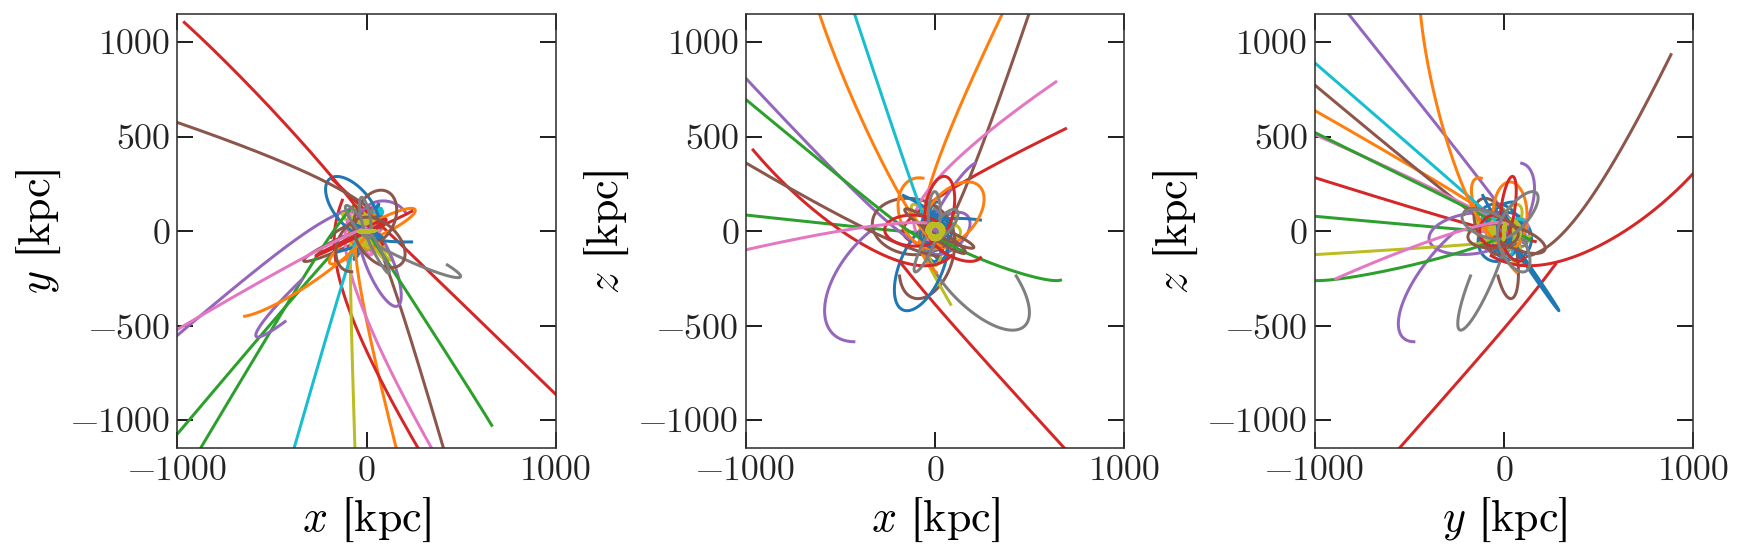

In [153]:
fig = orbits.plot()
for ax in fig.axes:
    ax.set_xlim(-1000, 1000)
    ax.set_ylim(-1000, 1000)

In [154]:
for i, name in enumerate(fritz18['name']):
    print('{} {:.0f} {:.0f} fritz: {:.0f} {:.0f}'
          .format(name, 
                  orbits[:, i].pericenter(), orbits[:, i].apocenter(),
                  fritz_orbits['peri'][i], fritz_orbits['apo'][i]))

Aquarius II 100 kpc 174 kpc fritz: 95 190
Boötes I 57 kpc nan kpc fritz: 32 77
Boötes II nan kpc nan kpc fritz: 38 167
Canes Venatici I 169 kpc nan kpc fritz: 54 254
Canes Venatici II 164 kpc nan kpc fritz: 85 234
Carina I 31 kpc nan kpc fritz: 60 106
Carina II 28 kpc 130 kpc fritz: 26 118
Carina III 30 kpc 138 kpc fritz: 28 106
Coma Berenices I 31 kpc 202 kpc fritz: 42 63
Crater I 26 kpc 145 kpc fritz: 46 153
Crater II 18 kpc 117 kpc fritz: 18 124
Draco I 27 kpc 98 kpc fritz: 28 91
Draco II 22 kpc 80 kpc fritz: 19 62
Eridanus II 349 kpc nan kpc fritz: 356 70846
Fornax I 75 kpc 429 kpc fritz: 58 147
Grus I 95 kpc 372 kpc fritz: 58 329
Hercules I 111 kpc nan kpc fritz: 14 187
Horologium I 77 kpc 731 kpc fritz: 70 94
Hydra II 93 kpc nan kpc fritz: 116 676
Hydrus I 24 kpc 60 kpc fritz: 25 73
Leo I 56 kpc 535 kpc fritz: 45 590
Leo II 96 kpc 342 kpc fritz: 41 238
Leo IV 141 kpc nan kpc fritz: 150 1794
Leo V 164 kpc nan kpc fritz: 165 4079
Phoenix I nan kpc 946 kpc fritz: 263 1549
Pisces II 